<a href="https://colab.research.google.com/github/SaifullahKatpar/PySpark/blob/master/PySpark_By_Example_Local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import findspark
findspark.init()

In [0]:
from pyspark.sql import SparkSession

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
                      .master('local[*]')\
                      .appName('first-spark-application')\
                      .getOrCreate()

In [0]:
from pyspark import SparkContext

In [0]:
sc = SparkContext.getOrCreate()

# Chicago Reported Crimes Dataset

In [0]:
from pyspark.sql.functions import to_timestamp,col,lit
path = "../data/"
rc = spark.read.csv(path+'reported-crimes.csv',header=True)\
              .withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a'))\
              .filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

# Working with Columns

## Unique Crimes

In [0]:
rc.select('Primary Type').distinct().show()

+--------------------+
|        Primary Type|
+--------------------+
|OFFENSE INVOLVING...|
|            STALKING|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|NON-CRIMINAL (SUB...|
|               ARSON|
|   DOMESTIC VIOLENCE|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|      NON - CRIMINAL|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|           RITUALISM|
|    PUBLIC INDECENCY|
| CRIM SEXUAL ASSAULT|
+--------------------+
only showing top 20 rows



## Order by IUCR

In [0]:
t0 = t.time()
rc.orderBy(col('IUCR')).show(5)
t1=t.time()
print('Exec time is:', t1-t0)

NameError: name 't' is not defined

## Single Row

In [0]:
t0 = t.time()
one_day = spark.read.csv(path+'reported-crimes.csv',header=True)\
              .withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a'))\
              .filter(col('Date') == lit('2018-11-12'))
t1=t.time()
print('Exec time is:', t1-t0)

In [0]:
one_day.count()

## Append Dataframe 

In [0]:
t0 = t.time()
rc.union(one_day).orderBy('Date',ascending=False ).show(5)
t1=t.time()
print('Exec time is:', t1-t0)

## Group By

In [0]:
t0 = t.time()
rc.groupby('Primary Type').count().orderBy('count',ascending=False).show(10)
t1=t.time()
print('Exec time is:', t1-t0)

# Challenge

**What percentage of reported crimes resulted in an arrest?**

In [0]:
arrest_pc = rc.filter(col('Arrest')=='true').count()/rc.select('Arrest').count()*100
print(arrest_pc)

  **What are the top 3 locations for reported crimes?**

In [0]:
rc.groupby('Location Description').count().orderBy('count', ascending=False).show(3)

# Built-in Functions

# String Manipulation

In [0]:
from pyspark.sql.functions import lower, upper, substring

In [0]:
rc.select(lower(col('Primary Type')),upper(col('Primary Type')), substring(col('Primary Type'),1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
|crim sexual assault|CRIM SEXUAL ASSAULT|                         CRIM|
|           burglary|           BURGLARY|                         BURG|
|              theft|              THEFT|                         THEF|
|crim sexual assault|CRIM SEXUAL ASSAULT|                         CRIM|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



# Working with Datetime

In [0]:
from pyspark.sql.functions import min, max

In [0]:
rc.select(min(col('Date')),max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-11 00:00:00|
+-------------------+-------------------+



In [0]:
from pyspark.sql.functions import date_add, date_sub

In [0]:
rc.select(date_sub(min('Date'),3),date_add(max('Date'),3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-14|
+----------------------+----------------------+



**2019-12-05 13:20:00**

In [0]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [0]:
df = spark.createDataFrame([('2019-12-05 13:20:00',)],['Christmas'])
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-05 13:20:00|
+-------------------+



In [0]:
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show(1)

+-------------------------------------------+------------------------------------------------+
|to_date(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|to_timestamp(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|
+-------------------------------------------+------------------------------------------------+
|                                 2019-12-05|                             2019-12-05 13:20:00|
+-------------------------------------------+------------------------------------------------+



**25/Dec/2019 13:20:00**

In [0]:
df = spark.createDataFrame([('25/Dec/2019 13:20:00',)],['Christmas'])
df.show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:20:00|
+--------------------+



In [0]:
df.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show(1)

+--------------------------------------------+-------------------------------------------------+
|to_date(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|to_timestamp(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|
+--------------------------------------------+-------------------------------------------------+
|                                  2019-12-25|                              2019-12-25 13:20:00|
+--------------------------------------------+-------------------------------------------------+



**12/25/2019 13:20:00 PM**

In [0]:
df = spark.createDataFrame([('12/25/2019 13:20:00 PM',)],['Christmas'])
df.show(1,truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 13:20:00 PM|
+----------------------+



In [0]:
df.select(to_date(col('Christmas'),'MM/dd/yyyy HH:mm:ss aa'), to_timestamp(col('Christmas'),'MM/dd/yyyy HH:mm:ss aa')).show(1)

+----------------------------------------------+---------------------------------------------------+
|to_date(`Christmas`, 'MM/dd/yyyy HH:mm:ss aa')|to_timestamp(`Christmas`, 'MM/dd/yyyy HH:mm:ss aa')|
+----------------------------------------------+---------------------------------------------------+
|                                          null|                                               null|
+----------------------------------------------+---------------------------------------------------+



# Police Stations Dataset

In [0]:
ps = spark.read.csv(path+'police-stations.csv',header=True)
ps.show(5)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters|  Headquarters| 3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|           1|       Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745-3693| 1176569.052| 1891771.704|41.85837259|-87.62735617|(41.858

**Distinct Districts**

In [0]:
ps.select('DISTRICT').distinct().show(5)

+------------+
|    DISTRICT|
+------------+
|Headquarters|
|           1|
|           6|
|          11|
|          16|
+------------+
only showing top 5 rows



In [0]:
rc.select('district').distinct().show(5)

+--------+
|district|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
+--------+
only showing top 5 rows



# Padding

In [0]:
from pyspark.sql.functions import lpad

In [0]:
ps.select(lpad(col('DISTRICT'),3,'0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 001|
|                 006|
|                 011|
|                 016|
|                 024|
|                 002|
|                 007|
|                 025|
|                 010|
|                 015|
|                 003|
|                 019|
|                 014|
|                 008|
|                 004|
|                 020|
|                 018|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [0]:
ps=ps.withColumn('Format_district',lpad(col('DISTRICT'),3,'0'))
ps.show(5)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters|  Headquarters| 3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|           1|       Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745

# Join

In [0]:
rc.join(ps, rc.District ==ps.Format_district,'left_outer' ).show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+--------+-----------+------------

In [0]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [0]:
rc.join(ps, rc.District ==ps.Format_district,'left_outer' ).drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district').show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|2001|08/05/2017 03:50:...|       4| South Chicago|
|11227287|   JB147188|2017-10-08 03:00:0

# Challenge

**What is the most frequently reported non-criminal activity?**

In [0]:
rc.select('Primary Type').distinct().orderBy('Primary Type').show(35,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN       |
|OTHER NARCOTIC VIOLATION   

In [0]:
nc=rc.filter( (col('Primary Type')=='NON - CRIMINAL') | (col('Primary Type')=='NON-CRIMINAL') | (col('Primary Type')=='NON-CRIMINAL (SUBJECT SPECIFIED)') )

In [0]:
nc.show()

+--------+-----------+-------------------+--------------------+----+--------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|  Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11249289|   JB176638|2016-12-23 12:00:00| 0000X N CENTRAL AVE|5093|  NON-CRIMINAL|       LOST PASSPORT|           RESIDENCE| false|   false|1513

In [0]:
nc.groupby(col('Description')).count().orderBy('count',ascending=False ).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |5    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [0]:
from pyspark.sql.functions import dayofweek

In [0]:
rc.select(col('Date'),dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2001-01-01 11:00:00|              2|
|2017-10-08 03:00:00|              1|
|2017-03-28 14:00:00|              3|
|2017-09-09 20:17:00|              7|
|2017-08-26 10:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import date_format

In [0]:
rc.select(col('Date'),dayofweek(col('Date')),date_format(col('Date'),'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2001-01-01 11:00:00|              2|                 Mon|
|2017-10-08 03:00:00|              1|                 Sun|
|2017-03-28 14:00:00|              3|                 Tue|
|2017-09-09 20:17:00|              7|                 Sat|
|2017-08-26 10:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [0]:
rc.groupby(date_format(col('Date'),'E')).count().orderBy('count',ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1016768|
|                 Wed| 973681|
|                 Tue| 967845|
|                 Sat| 965005|
|                 Thu| 964360|
|                 Mon| 952532|
|                 Sun| 911781|
+--------------------+-------+



In [0]:
rc.groupby(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=911781),
 Row(date_format(Date, E)='Mon', count=952532),
 Row(date_format(Date, E)='Thu', count=964360),
 Row(date_format(Date, E)='Sat', count=965005),
 Row(date_format(Date, E)='Wed', count=973681),
 Row(date_format(Date, E)='Tue', count=967845),
 Row(date_format(Date, E)='Fri', count=1016768)]

In [0]:
dow=[x[0] for x in rc.groupby(date_format(col('Date'),'E')).count().collect()]

In [0]:
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Tue', 'Fri']

In [0]:
cnt=[x[1] for x in rc.groupby(date_format(col('Date'),'E')).count().collect()]

In [0]:
cnt

[911781, 952532, 964360, 965005, 973681, 967845, 1016768]

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
cp = pd.DataFrame({'Day_of_week':dow,'Count':cnt})

In [0]:
cp

,Day_of_week,Count
0,Sun,911781
1,Mon,952532
2,Thu,964360
3,Sat,965005
4,Wed,973681
5,Tue,967845
6,Fri,1016768


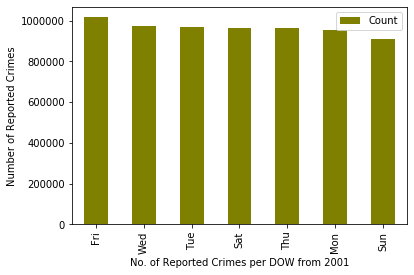

In [0]:
cp.sort_values('Count',ascending=False).plot(kind='bar',color='olive',x='Day_of_week',y='Count')
plt.xlabel('Day of the week')
plt.ylabel('Number of Reported Crimes')
plt.xlabel('No. of Reported Crimes per DOW from 2001')
plt.show()

# RDD Setup

In [0]:
psrdd = sc.textFile(path+'police-stations.csv')

In [0]:
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [0]:
ps_header = psrdd.first()

In [0]:
ps_rest = psrdd.filter(lambda line: line!=ps_header)
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

In [0]:
ps_rest.map(lambda line: line.split(',')).collect()

[['Headquarters',
  'Headquarters',
  '3510 S Michigan Ave',
  'Chicago',
  'IL',
  '60653',
  'http://home.chicagopolice.org',
  '',
  '',
  '',
  '1177731.401',
  '1881697.404',
  '41.83070169',
  '-87.62339535',
  '"(41.8307016873',
  ' -87.6233953459)"'],
 ['1',
  'Central',
  '1718 S State St',
  'Chicago',
  'IL',
  '60616',
  'http://home.chicagopolice.org/community/districts/1st-district-central/',
  '312-745-4290',
  '312-745-3694',
  '312-745-3693',
  '1176569.052',
  '1891771.704',
  '41.85837259',
  '-87.62735617',
  '"(41.8583725929',
  ' -87.627356171)"'],
 ['6',
  'Gresham',
  '7808 S Halsted St',
  'Chicago',
  'IL',
  '60620',
  'http://home.chicagopolice.org/community/districts/6th-district-gresham/',
  '312-745-3617',
  '312-745-3649',
  '312-745-3639',
  '1172283.013',
  '1853022.646',
  '41.75213684',
  '-87.64422891',
  '"(41.7521368378',
  ' -87.6442289066)"'],
 ['11',
  'Harrison',
  '3151 W Harrison St',
  'Chicago',
  'IL',
  '60612',
  'http://home.chicagopol

In [0]:
ps_rest.map(lambda line: line.split(',')).count()

24

In [0]:
(ps_rest.filter(lambda line: line.split(',')[0]=='7').
    map(lambda  line: (line.split(',')[0],
                       line.split(',')[2],
                       line.split(',')[5],
                       line.split(',')[1],
                      )).collect())

[('7', '1438 W 63rd St', '60636', 'Englewood')]

In [0]:
(ps_rest.filter(lambda line: line.split(',')[0] in ['10','11'])
         .map(lambda line: (line.split(',')[1],
                            line.split(',')[2],
                            line.split(',')[5],
                           )).collect())

[('Harrison', '3151 W Harrison St', '60612'),
 ('Ogden', '3315 W Ogden Ave', '60623')]

In [0]:
spark.stop()